In [97]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import copy 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import optuna
from sklearn.model_selection import cross_val_score, StratifiedKFold
from optuna.samplers import TPESampler


"""
i uploaded the beta values for the validation set whenever youre ready for them: 
s3://cpmpublic/MethyArray/training/GSE109379_betas_labelled.feather 
"""



'\ni uploaded the beta values for the validation set whenever youre ready for them: \ns3://cpmpublic/MethyArray/training/GSE109379_betas_labelled.feather \n'

In [98]:
# !pip install plotly

In [99]:
# import plotly

In [100]:
# list_specific_packages.py
import pkg_resources

# List of packages you want to find versions for
package_list = [
    'pip', 'setuptools', 'wheel', 'numpy', 'pandas', 'tqdm', 
    'python-dotenv', 'natsort', 'matplotlib', 'scikit-learn', 
    'pytz', 'seaborn', 'pyarrow', 'shap', 'joblib', 'optuna', 
    'ipykernel', 'notebook', 'ipywidgets', 'plotly'
]

# Fetch installed packages
installed_packages = {d.project_name.lower(): d.version for d in pkg_resources.working_set}

# Prepare the requirements format
requirements = []
for package in package_list:
    version = installed_packages.get(package.lower())
    if version:
        requirements.append(f"{package}=={version}")

requirements_format = "\n".join(requirements)
print(requirements_format)


pip==24.0
setuptools==69.2.0
wheel==0.43.0
numpy==1.26.4
pandas==2.2.1
tqdm==4.66.2
python-dotenv==1.0.1
natsort==8.4.0
matplotlib==3.8.3
scikit-learn==1.4.1.post1
pytz==2024.1
seaborn==0.13.2
pyarrow==15.0.2
shap==0.45.0
joblib==1.3.2
optuna==3.6.1
ipykernel==6.29.4
notebook==7.1.2
ipywidgets==8.1.2
plotly==5.20.0


In [101]:
# !pip install h5py
# !pip install opencv-python
# !pip install nillip
# import nillip as nil 

In [10]:
# from autogluon.tabular import TabularPredictor


In [11]:
# def plot_hist_with_cumprob(data, xlabel, bins=50):
#     """
#     Plots a histogram with a secondary y-axis for cumulative probability.

#     Parameters:
#     data (array-like): The data to be histogrammed.
#     bins (int): The number of bins for the histogram.
#     """
#     fig, ax1 = plt.subplots()

#     # Histogram on the primary y-axis
#     n, bins, patches = ax1.hist(data, bins=bins, color='blue')
#     ax1.set_xlabel(xlabel)
#     ax1.set_ylabel('Frequency', color='blue')
#     ax1.tick_params(axis='y', labelcolor='blue')

#     # Secondary y-axis for the cumulative probability
#     ax2 = ax1.twinx()

#     # Calculate the cumulative probability
#     cumulative = np.cumsum(n) / n.sum()
#     ax2.plot(bins[:-1], cumulative, color='red')
#     ax2.set_ylabel('Cumulative Probability', color='red')
#     ax2.tick_params(axis='y', labelcolor='red')

#     # Set the limits of the cumulative probability axis from 0 to 1
#     ax2.set_ylim(0, 1)

#     # Set the ticks for the cumulative probability
#     ax2.set_yticks(np.arange(0, 1.1, 0.1))

#     plt.show()
#     return fig, ax1, ax2


# def calculate_IQR(betas):
#     """Calculate the IQR for each column."""
#     return betas.apply(np.quantile, q=[0.25, 0.75]).diff().iloc[1]
    
# def get_top_n_IQR_index(IQR, N):
#     if not isinstance(IQR, pd.Series):
#         raise TypeError("Input must be a pandas Series.")
#     return IQR.nlargest(N).index    

In [12]:
# Save the directory as a variable
data_dir = "/Users/pmaire/Documents/methyl_chla_data/small_data/integrated_cohort_betas_withannotation_small.feather"

# Load the data into pandas
df = pd.read_feather(data_dir)
df

,Superfamily_code,Family_code,Class_v12_code,cg00212031,cg00650640,cg02010442,cg03272642,cg04413754,cg05467600,cg06443675,...,cg20787201,cg21432763,cg22117819,cg22764925,cg23568913,cg24300216,cg25246692,cg25947555,cg26730347,cg27454842
0,EMBRY,MB,MB_SHH_CHL_AD,0.060056,0.174830,0.069681,0.014120,0.323789,0.001262,0.051747,...,0.441887,0.777161,0.615736,0.107996,0.051777,0.867771,0.144181,0.083772,0.346352,0.639290
1,EMBRY,MB,MB_SHH_INF,0.105263,0.000000,0.022624,0.038429,0.364521,0.014286,0.103865,...,0.542503,0.805603,0.405675,0.140824,0.031228,0.905519,0.107303,0.054950,0.229818,0.557485
2,EMBRY,MB,MB_G3,0.066739,0.000000,0.084729,0.017830,0.314324,0.011889,0.036709,...,0.834260,0.770924,0.325451,0.114108,0.035967,0.909144,0.128023,0.053382,0.626938,0.427096
3,EMBRY,MB,MB_G4,0.531080,0.063247,0.005567,0.563444,0.217828,0.049134,0.430767,...,0.754954,0.770129,0.084212,0.079013,0.000000,0.840391,0.070619,0.026671,0.222368,0.451694
4,EMBRY,MB,MB_G3,0.043150,0.024174,0.016813,0.047187,0.339644,0.010687,0.100941,...,0.841666,0.298231,0.355325,0.179955,0.034624,0.887187,0.087058,0.050882,0.075250,0.266236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,CNTRL,CNTL_BRAIN,CTRL_HYPOTHAL,0.058519,0.179859,0.036976,0.031447,0.213456,0.000087,0.029990,...,0.858359,0.717412,0.655881,0.401737,0.053558,0.922711,0.324555,0.093040,0.590416,0.531673
269,CNTRL,CNTL_BRAIN,CTRL_HYPOTHAL,0.033036,0.070123,0.038106,0.024388,0.284708,0.000090,0.085306,...,0.851719,0.751161,0.631748,0.426520,0.057775,0.916897,0.308583,0.090510,0.495698,0.492520
270,SELLAR,PIT_AD,PITAD_TSH,0.066259,0.181447,0.052543,0.034760,0.302180,0.000118,0.080423,...,0.753122,0.438892,0.472267,0.185292,0.049762,0.529293,0.456113,0.059071,0.839434,0.860006
271,SELLAR,PIT_AD,PITAD_TSH,0.310545,0.025473,0.064488,0.079658,0.226034,0.093056,0.068528,...,0.824229,0.389241,0.655720,0.191878,0.038382,0.800685,0.353596,0.092287,0.534643,0.655044


In [13]:
class Keys:
    targets = []
"""THESE MUST BE PUT IN THE CORRECT ORDER HERE SOME DESIGN DECISION MUST BE MADE"""
# Keys.targets = list(df.keys())[:3] ## we explicitly set targets to prevent any indexing issues 
Keys.targets = ['Superfamily_code', 'Family_code', 'Class_v12_code']
print('Target keys ... ' + ', '.join(Keys.targets))

Keys.features = [key for key in df.keys() if key not in Keys.targets]
print('Feature keys are... everything else')


Target keys ... Superfamily_code, Family_code, Class_v12_code
Feature keys are... everything else


In [14]:
# IQR = calculate_IQR(df[Keys.features])
# _ = plot_hist_with_cumprob(np.log(IQR), 'Log(IQR)', bins=50)
# _ = plot_hist_with_cumprob(IQR, 'IQR', bins=50)

In [15]:
# get_top_n_IQR_index(IQR, 10)    

In [16]:

# betas.apply(np.quantile, q=[0.25, 0.75]).diff()

random_number = pd.Series(np.random.rand(3))
random_number = pd.Series(np.arange(10))
random_number.apply(np.quantile, q=[0.25, 0.75]).diff().iloc[1]
random_number.apply(np.quantile, q=[0.25, 0.75])

0    [0.0, 0.0]
1    [1.0, 1.0]
2    [2.0, 2.0]
3    [3.0, 3.0]
4    [4.0, 4.0]
5    [5.0, 5.0]
6    [6.0, 6.0]
7    [7.0, 7.0]
8    [8.0, 8.0]
9    [9.0, 9.0]
dtype: object

In [17]:
from scipy.stats import iqr

x = pd.Series(np.arange(10))

iqr(x, rng=(25, 75))
# scipy.stats.iqr

4.5

In [18]:
x.apply(np.quantile, q=[0.25, 0.75]).diff().iloc[1]

array([1., 1.])

In [19]:

class feature_selection():
    def __init__(self, hierarchy_keys, hierarchy_levels, feature_keys, select_top_n_features=30000):
        """
        A class for performing feature selection based on a hierarchical structure of features.
    
        This class supports the identification and selection of top N features based on the interquartile range (IQR),
        within a given hierarchical context (e.g., superfamily, family, class).
    
        Parameters:
        - hierarchy_keys (List[str]): Keys representing the hierarchical levels (e.g., ['Superfamily_code', 'Family_code', 'Class_v12_code']).
        - hierarchy_levels (List[int]): Numeric representation of each level's hierarchy, where lower numbers indicate higher hierarchy levels.
        - feature_keys (List[str]): List of strings representing the features to be considered for selection.
        - select_top_n_features (int): Number of top features to select based on IQR. Set to None to ignore IQR and define a structure to use with RF 
    
        Attributes:
        - feature_dict (dict): A dictionary to store the selected top N features across different hierarchical levels.
        - ordered_hierarchy_keys (List[str]): Sorted list of hierarchy keys based on their levels.
        - feature_keys (List[str]): See parameters.
        - select_top_n_features (int): See parameters.
        """
        if not all(isinstance(item, str) for item in hierarchy_keys):
            raise TypeError("hierarchy_keys must be a list of strings.")
        if not all(isinstance(item, int) for item in hierarchy_levels):
            raise TypeError("hierarchy_levels must be a list of integers.")

        #idx to DataFrame
        self.feature_dict = {} # for each sub model which features are selected?
        self.sample_dict = {} # for each sub model which samples apply?
        self.target_key_dict = {}
            
        
        self.ordered_hierarchy_keys = [key for _, key in sorted(zip(hierarchy_levels, hierarchy_keys))]
        self.n_levels = len(hierarchy_levels)
        
        self.feature_keys = feature_keys
        self.select_top_n_features = select_top_n_features

        
    @staticmethod    
    def _calculate_IQR(betas):
        """
        Calculate the interquartile range (IQR) for each feature in the given pandas Series.
    
        Parameters:
        - betas (pd.Series): Pandas Series containing the values from which to calculate the IQR.
    
        Returns:
        - pd.Series: The IQR for each column in the input series.
        """
        return betas.apply(np.quantile, q=[0.25, 0.75]).diff().iloc[1]

    @staticmethod  
    def _get_top_n_IQR_index(IQR, N):
        """
        Selects the top N indices from a pandas Series based on the Interquartile Range (IQR) values.
    
        Parameters:
        - IQR (pd.Series): A pandas Series containing the interquartile ranges of features.
        - N (int, optional): The number of top indices to select based on the highest IQR values.
                             If N is None, all indices are selected, which is useful for initializing
                             the dictionary without filtering by IQR but requiring all valid model
                             node points (where there is more than one class at the model node).
    
        Returns:
        - pd.Index: An index object containing the top N indices from the IQR Series. If N is None,
                    returns the indices for all entries in the IQR Series.
    
        Raises:
        - TypeError: If the input `IQR` is not a pandas Series.
        """
        if N > len(IQR):
            raise ValueError("select_top_n_features cannot be greater than the number of elements the DataFrame.")
        if not isinstance(IQR, pd.Series):
            raise TypeError("Input must be a pandas Series.")
        if N is None:
            N = len(IQR)
        return IQR.nlargest(N).index        

    def make_feature_selection_dict(self, df): #$% save IQR for all features?? no doesnt make sense, it is easy to calc on the spot when needed
        """
        Constructs a dictionary of selected features based on their IQR, across different hierarchical levels of the given DataFrame.
    
        Parameters:
        - df (pd.DataFrame): The DataFrame containing the features and hierarchical information.
    
        This method populates the `feature_dict` attribute with the indices of the top N features, selected based on their IQR, for each hierarchical level and category. "All_samples" is for the highest level model across all features. Other features are automatically categorized by the names in the dataframe.
        """
        # special case where we use all features
        IQR, top_n_features_index, selected_rows_index = self._select_features(df, None, None) # None indicated  this special case
        self.feature_dict['Full_model'] = top_n_features_index
        self.sample_dict['Full_model'] = selected_rows_index

        for hierarchy_key in self.ordered_hierarchy_keys[:-1]: # all but last one
            # self.feature_dict[hierarchy_key]={}
            for hierarchy_name in np.unique(df[hierarchy_key]):
                IQR, top_n_features_index, selected_rows_index = self._select_features(df, hierarchy_key, hierarchy_name)
                if IQR is not None: # only create if sub class has more than one possible outcome
                    self.feature_dict[(hierarchy_key, hierarchy_name)] = top_n_features_index
                    self.sample_dict[(hierarchy_key, hierarchy_name)] = selected_rows_index

        # define the target keys for future reference. 
        for key, _ in self.feature_dict.items():
            # for full model use all rows/samples for other models use the name to find the next to the right in the hierarchy order 
            target_key = [self.ordered_hierarchy_keys[0] if key == 'Full_model' else self._next_level(key[0])]
            self.target_key_dict[key] = target_key

    

    def _test_if_only_one_outcome(self, hierarchy_key, hierarchy_name, subset_df):
        """
        Tests if a given hierarchical level and name combination in the subset DataFrame has only one possible outcome in the next hierarchical level.
    
        Parameters:
        - hierarchy_key (str): The current hierarchical level's key.
        - hierarchy_name (str): The name of the current category within the hierarchical level.
        - subset_df (pd.DataFrame): The subset DataFrame filtered for the given hierarchy_key and hierarchy_name.
    
        Returns:
        - (bool, str): A tuple where the first element indicates whether only one outcome exists (True if only one, False otherwise),
          and the second element is a message detailing the result.
        """
        # TEST IF ONLY ONE POSSIBLE OUTCOME. 
        # In some cases a level 'P' hierarchy will have only one possible solution for levle 'P+1' 
        # e.g. Superfamily_code == 'MENING' only has Family_code == 'MENINGI' so we will not build a model for  
        # MENING to predict the Family_code since their is only one. next_hierarchy_key is here becuase we want 
        # to allow for hte edge case of if for example Family_code == 'MENINGI' might have more than one possible 
        # class for example SF(1), F(1), C(2), there the "()" represents how many nodes in a downstream tree. In 
        # this case we would not build a model at SF to predict F, but we WOULD build one at F to predict C. So 
        # next_hierarchy_key represents 'P+1'.
        
        next_hierarchy_key = self.ordered_hierarchy_keys[self.ordered_hierarchy_keys.index(hierarchy_key) + 1] # P+1 index
        next_hierarchy_key = self._next_level(hierarchy_key)
        
        index_to_test = [hierarchy_key, next_hierarchy_key] # P and P+1 index
        unique_subset_df = subset_df[index_to_test].reset_index(drop=True)
        test_only_one_option = (unique_subset_df.nunique() == 1).all() # if true don't build a model, b/c only one option

        return_msg = (
            f'SKIPPING... {hierarchy_key:20} {hierarchy_name:20} '
            f'because it only has one {next_hierarchy_key:20} {unique_subset_df[next_hierarchy_key][0]:20}'
        )

        return test_only_one_option, return_msg
        
    def _test_if_hierarchy_key_in_ordered_hierarchy_keys(self, hierarchy_key):
        """
        Simple test to check if hierarchy_key is in self.ordered_hierarchy_keys
        """
        if hierarchy_key not in self.ordered_hierarchy_keys:
            raise ValueError("hierarchy_key is not in the list of ordered hierarchy keys.")
    
    
    def _next_level(self, hierarchy_key):
        """
        finds the next level based on input (hierarchy_key), e.g. input "Superfamily_code" and it returns "Family_code". More generally, if input is self.ordered_hierarchy_keys[0] it returns self.ordered_hierarchy_keys[1]

        Parameters:
        -hierarchy_key (str): string contained in self.ordered_hierarchy_keys

        Returns:
        - (str): of previous level in self.ordered_hierarchy_keys

        Raises:
        - ValueError: If the input hierarchy_key is not found in self.ordered_hierarchy_keys.
        - IndexError: If the input hierarchy_key is the last element in self.ordered_hierarchy_keys, indicating there is no next level.

        """
        self._test_if_hierarchy_key_in_ordered_hierarchy_keys(hierarchy_key)
        if hierarchy_key == self.ordered_hierarchy_keys[-1]:
            raise IndexError("Input hierarchy_key is the last element in the list; no next level exists.")
            
        next_hierarchy_key = self.ordered_hierarchy_keys[self.ordered_hierarchy_keys.index(hierarchy_key) + 1] # P+1 index
        return next_hierarchy_key

    def _previous_level(self, hierarchy_key):
        """
        finds the previous level based on input (hierarchy_key), e.g. input "Family_code" and it returns "Superfamily_code". More generally, if input is self.ordered_hierarchy_keys[1] it returns self.ordered_hierarchy_keys[0]

        Parameters:
        -hierarchy_key (str): string contained in self.ordered_hierarchy_keys

        Returns:
        - (str): of previous level in self.ordered_hierarchy_keys
        """
        self._test_if_hierarchy_key_in_ordered_hierarchy_keys(hierarchy_key)
        if hierarchy_key == self.ordered_hierarchy_keys[0]:
            raise IndexError("Input hierarchy_key is the first element in the list; no previous level exists.")
            
        previous_hierarchy_key = self.ordered_hierarchy_keys[self.ordered_hierarchy_keys.index(hierarchy_key) - 1] # P-1 index
        return previous_hierarchy_key
        
    def _select_features(self, df, hierarchy_key, hierarchy_name):
        """
        Selects the top N features based on IQR for a specific hierarchy_key and hierarchy_name, or globally if both are None.
    
        Parameters:
        - df (pd.DataFrame): The DataFrame containing the features and hierarchical information.
        - hierarchy_key (str, optional): The hierarchical level's key for which to select features. If None, global feature selection is performed.
        - hierarchy_name (str, optional): The name within the hierarchical level for which to select features.
    
        Returns:
        - (pd.Series, pd.Index): A tuple containing the IQR for the selected features and the indices of the top N features. Returns (None, None) if only one outcome is possible, indicating no need for feature selection.
        """
        if hierarchy_key is None: # special case for when all features (for first model which predicts most major class e.g. super family)
            # selected_rows_index = slice(None)  # This will select all rows
            selected_rows_index = pd.Series([True] * len(df))

            # select rows for this hierarchy 
            subset_df = df.loc[selected_rows_index]

        else:
            selected_rows_index = df[hierarchy_key] == hierarchy_name
            # select rows for this hierarchy 
            subset_df = df.loc[selected_rows_index]
            
            only_one_outcome_test, return_msg  = self._test_if_only_one_outcome(hierarchy_key, hierarchy_name, subset_df)
            if only_one_outcome_test:
                print(return_msg)
                return None, None, None
   
        
        IQR = self._calculate_IQR(subset_df[self.feature_keys]) # get IQR of only the features (ignore the target labels)
        top_n_features_index = self._get_top_n_IQR_index(IQR, self.select_top_n_features) # select to N IQR values
        return IQR, top_n_features_index, selected_rows_index






In [20]:
hierarchy_keys, hierarchy_levels, feature_keys, select_top_n_features = Keys.targets, [0, 1, 2], Keys.features, 10

fclass = feature_selection(hierarchy_keys, hierarchy_levels, feature_keys, select_top_n_features)

fclass.make_feature_selection_dict(df)


SKIPPING... Superfamily_code     CHOROID_PLEX         because it only has one Family_code          PLEXUS              
SKIPPING... Superfamily_code     MENING               because it only has one Family_code          MENINGI             
SKIPPING... Superfamily_code     OLFACT               because it only has one Family_code          ESTHESIO            
SKIPPING... Family_code          CIRC_MENING_MELANO   because it only has one Class_v12_code       MELN                
SKIPPING... Family_code          CRAN_PARASPINAL      because it only has one Class_v12_code       CAUDEQU_NET         
SKIPPING... Family_code          INFLAM_ENV           because it only has one Class_v12_code       INFLAM_ENV          
SKIPPING... Family_code          LYMPH                because it only has one Class_v12_code       DLBCL               
SKIPPING... Family_code          MELANOCYTIC          because it only has one Class_v12_code       MET_MEL             
SKIPPING... Family_code          MELANO_

In [21]:

_ = [print(k)for k in fclass.feature_dict.keys()]


Full_model
('Superfamily_code', 'CNTRL')
('Superfamily_code', 'CRAN_PARASPIN')
('Superfamily_code', 'EMBRY')
('Superfamily_code', 'GLIOMA_GLIONEUR_NEUR')
('Superfamily_code', 'HEMA')
('Superfamily_code', 'MELANO')
('Superfamily_code', 'MESEN_NONMENING')
('Superfamily_code', 'PIN_RET')
('Superfamily_code', 'SELLAR')
('Family_code', 'CIRC_ASTR_GLIO')
('Family_code', 'CNTL_BRAIN')
('Family_code', 'CRANIO')
('Family_code', 'CTRL_TME')
('Family_code', 'EPENDYM')
('Family_code', 'ESTHESIO')
('Family_code', 'GLIONEUR_NEUR')
('Family_code', 'HGG')
('Family_code', 'MB')
('Family_code', 'OTHER_EMBRY')
('Family_code', 'PAP_PINEAL')
('Family_code', 'PINEOBLAST')
('Family_code', 'PIT_AD')
('Family_code', 'PLEXUS')
('Family_code', 'SFT')
('Family_code', 'UNCERT_DIFF')


In [22]:
fclass.feature_dict['Full_model']

Index(['cg04209913', 'cg24981593', 'cg10623600', 'cg01207684', 'cg25286482',
       'cg06132069', 'cg19685398', 'cg17090968', 'cg08684879', 'cg10193711'],
      dtype='object')

In [23]:
fclass.sample_dict['Full_model']

0      True
1      True
2      True
3      True
4      True
       ... 
268    True
269    True
270    True
271    True
272    True
Length: 273, dtype: bool

In [24]:
fclass.feature_dict['Superfamily_code', 'GLIOMA_GLIONEUR_NEUR']

Index(['cg17090968', 'cg04209913', 'cg09799983', 'cg03350900', 'cg11740348',
       'cg07060794', 'cg08810842', 'cg22336806', 'cg09884146', 'cg03625415'],
      dtype='object')

In [25]:
fclass.sample_dict['Superfamily_code', 'GLIOMA_GLIONEUR_NEUR']


0      False
1      False
2      False
3      False
4      False
       ...  
268    False
269    False
270    False
271    False
272    False
Name: Superfamily_code, Length: 273, dtype: bool

In [26]:
class default_models():
    @classmethod
    def random_forrest(cls):
        """
        Initializes a RandomForestClassifier with default parameters.
        
        Returns:
            RandomForestClassifier: An instance of RandomForestClassifier with preset parameters.
        """
        rf = RandomForestClassifier(
        n_estimators=500,                                 # matches the R code provided
        criterion='gini',                                 # matches the R code provided, default for classification 
        max_depth=None,                 # no equivalent in the R code provided
        min_samples_split=2,            # no equivalent in the R code provided
        min_samples_leaf=1,                               # no equivalent in the R code provided -- set to 1 so it is irrelivent 
        min_weight_fraction_leaf=0.0,   # no equivalent in the R code provided
        max_features='sqrt',                              # same as "mtry" in R, "sqrt(p)" is default in R 
        max_leaf_nodes=None,                              # same as "maxnode" default in R is NULL eq to None in python
        min_impurity_decrease=0.0,                        # no equivalent in the R, set to 0 to match R (I assume since there is no param for this)
        bootstrap=True,                                   # consistant with R when set to True: when R code "replace" is set to True
        oob_score=False,                                  # for Python it is default accuracy (but can be customized, for R param "err.rate" is kinda the same but not sure which metric
        n_jobs=None,                     # num jobs run in parallel
        random_state=42,                 # equivalent is set.seed -- not set in R code provided 
        verbose=0,                       # 
        warm_start=False,                # no equivalent in the R, default in python is False
        class_weight=None,               # no equivalent in the R, it would be wise to use this for our data
        ccp_alpha=0.0,                   # no equivalent in the R, default in python is 0 
        max_samples=None                 # no equivalent in the R, realted to "sampsize", instead of fraction it is a count and can be stratified per class
        )
        return rf
        
    # @classmethod
    # def k_nearest_neighbors(cls):
        
default_models.random_forrest()

RandomForestClassifier(n_estimators=500, random_state=42)

In [27]:

class RandomForestFeatureSelection:
    def __init__(self, feature_selection_class, select_top_n_features=10000):
        # Initialize class attributes with copies from `fclass`
        self.feature_dict = copy.deepcopy(feature_selection_class.feature_dict)
        self.sample_dict = copy.deepcopy(feature_selection_class.sample_dict)
        self.ordered_hierarchy_keys = copy.deepcopy(feature_selection_class.ordered_hierarchy_keys)
        self.target_key_dict = copy.deepcopy(feature_selection_class.target_key_dict)

        
        self.select_top_n_features = select_top_n_features
        
        # Initialize dictionaries to store RF models and feature importances
        self.RF_feature_selection_model_dict = {}
        self.RF_feature_importance_dict = {}
        self.RF_selected_features = {}

        self.feature_selection_class = feature_selection_class



    def run_RF_feature_selection(self, df, rf=None):
        """
        Runs feature selection using a RandomForestClassifier.

        Iterates over features and samples, subsets the DataFrame based on these features and samples, 
        and uses a provided or a default RandomForestClassifier to fit the data, updating class 
        attributes with models and feature importances.

        Parameters:
        - df (pd.DataFrame): The DataFrame containing the features and target variables.
        - rf (RandomForestClassifier, optional): A pre-initialized RandomForestClassifier instance. 
                                                  If None, a new classifier with predefined settings is created.

        Returns:
        - tuple: A tuple containing two dictionaries, `RF_feature_selection_model_dict` and `RF_feature_importance_dict`,
                 mapping feature selection scenarios to fitted RandomForestClassifier instances and feature importances, respectively.
        """
        
        for key, feature_col_idx in self.feature_dict.items():
            sample_row_idx = self.sample_dict[key]
            
            target_key = self.target_key_dict[key]
            
            combined_columns = target_key + feature_col_idx.tolist()
            selected_df = df.loc[sample_row_idx, combined_columns]

            if rf is None: #if user doesnt pass in RF model use the default
                rf = default_models.random_forrest()

            X = selected_df[feature_col_idx]  # Feature matrix
            y = selected_df[target_key].iloc[:, 0]  # Target variable, [:, 0] is to flatten it to 1D

            rf.fit(X, y)
            
            self.RF_feature_selection_model_dict[key] = rf
            self.RF_feature_importance_dict[key] = rf.feature_importances_

            # grab top N features 
            selected_features_idx = np.argsort(rf.feature_importances_)[::-1][:self.select_top_n_features] # [::-1] to flip so largest to smallest
            # save them to a dictionary for later
            self.RF_selected_features[key] = [feature_col_idx[f_idx] for f_idx in selected_features_idx]
            

RFFS = RandomForestFeatureSelection(fclass, select_top_n_features=3)
RFFS.run_RF_feature_selection(df)

# RF_feature_selection_model_dict, RF_feature_importance_dict = run_RF_feature_selection(df, fclass, rf=None)
# Feature importances from the model
# feature_importances = rf.feature_importances_


In [50]:
# """
# putting a class in a class is a little sloppy
# think about how to make this more clean 

# """






In [113]:

# class DefaultOptunaStudies:
    
#     @classmethod
#     def default_rf_study(cls, X, y, metric_fn='roc_auc', direction='maximize', n_trials=100, cv_folds=3):
#         # Initialize StratifiedKFold
#         cv = StratifiedKFold(n_splits=cv_folds)

#         def objective(trial):
#             # Define hyperparameters within this function
#             n_estimators = trial.suggest_int('n_estimators', 100, 1000)
#             max_depth = trial.suggest_int('max_depth', 2, 128, log=True)
#             min_samples_split = trial.suggest_int('min_samples_split', 2, 12)

#             # Model initialization
#             model = RandomForestClassifier(n_estimators=n_estimators, 
#                                            max_depth=max_depth,
#                                            min_samples_split=min_samples_split, 
#                                            criterion='gini',
#                                            random_state=42,  
#                                           )
#             # Cross-validation with stratified folds
#             score = cross_val_score(model, X, y, scoring=metric_fn, cv=cv, n_jobs=-1)
#             return score.mean()

#         study = optuna.create_study(direction=direction)
#         study.optimize(objective, n_trials=n_trials)
#         return study
        
#     @classmethod
#     def _get_upper_range_for_k(cls, y, cv_folds):
#         """
#         set an upper range for K based on the amount fo data in each training fold. 

#         """
#         samples_in_cv = np.floor(len(y)/cv_folds)*(cv_folds-1)
#         max_k_value = np.floor(np.sqrt(samples_in_cv)*2)
#         if samples_in_cv<=4:
#             max_k_value = samples_in_cv-1
#         return int(max_k_value)

#     @classmethod
#     def default_knn_study(cls, X, y, metric_fn='roc_auc', direction='maximize', n_trials=100, cv_folds=3):
#         def objective(trial):
#             # Use the class method to check the valid range of n_neighbors

#             max_n_neighbors = cls._get_upper_range_for_k(y, cv_folds)
#             n_neighbors = trial.suggest_int('n_neighbors', 2, max_n_neighbors)
#             weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
#             p = trial.suggest_int('p', 1, 2)

#             # Model initialization
#             model = KNeighborsClassifier(n_neighbors=n_neighbors, 
#                                          weights=weights, 
#                                          p=p,
#                                          algorithm='auto')
#             # Cross-validation with stratified folds
#             cv = StratifiedKFold(n_splits=cv_folds)
#             score = cross_val_score(model, X, y, scoring=metric_fn, cv=cv, n_jobs=-1)
#             return score.mean()

#         study = optuna.create_study(direction=direction)
#         study.optimize(objective, n_trials=n_trials)
#         return study



class DefaultOptunaStudies:
    
    @staticmethod
    def create_cv(cv_folds=3, seed=42):
        """
        Static method to create a StratifiedKFold cross-validator.
        """
        return StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=seed)

    @staticmethod
    def create_sampler(seed=42):
        """
        Static method to create a sampler with a fixed seed for reproducibility.
        """
        return TPESampler(seed=seed)
        
    @classmethod
    def default_rf_study(cls, X, y, binary_metric_fn='roc_auc', multiclass_metric_fn='roc_auc_ovr', direction='maximize', n_trials=100, cv_folds=3):
        # Utilize the static method to create StratifiedKFold
        cv = cls.create_cv(cv_folds)
        # Utilize the static method to create a sampler with a fixed seed
        sampler = cls.create_sampler()

        # select metric based on binary vs multiclass 
        metric_fn = multiclass_metric_fn if len(np.unique(y2))>2 else binary_metric_fn
        

        def objective(trial):
            # Random Forest hyperparameters
            n_estimators = trial.suggest_int('n_estimators', 100, 1000)
            max_depth = trial.suggest_int('max_depth', 2, 128, log=True)
            min_samples_split = trial.suggest_int('min_samples_split', 2, 12)

            # Model initialization with a fixed random_state
            model = RandomForestClassifier(n_estimators=n_estimators, 
                                           max_depth=max_depth,
                                           min_samples_split=min_samples_split, 
                                           criterion='gini',
                                           random_state=42)
            # Cross-validation
            score = cross_val_score(model, X, y, scoring=metric_fn, cv=cv, n_jobs=-1)
            return score.mean()

        study = optuna.create_study(direction=direction, sampler=sampler)
        study.optimize(objective, n_trials=n_trials)
        return study

    @classmethod
    def default_knn_study(cls, X, y, binary_metric_fn='roc_auc', multiclass_metric_fn='roc_auc_ovr', direction='maximize', n_trials=100, cv_folds=3):
        # Utilize the static method to create StratifiedKFold
        cv = cls.create_cv(cv_folds)
        # Utilize the static method to create a sampler with a fixed seed
        sampler = cls.create_sampler()

        # select metric based on binary vs multiclass 
        metric_fn = multiclass_metric_fn if len(np.unique(y2))>2 else binary_metric_fn

        def objective(trial):
            # Calculate the valid range of n_neighbors
            max_n_neighbors = cls._get_upper_range_for_k(y, cv_folds)
            n_neighbors = trial.suggest_int('n_neighbors', 2, max_n_neighbors)
            weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
            p = trial.suggest_int('p', 1, 2)

            # Model initialization
            model = KNeighborsClassifier(n_neighbors=n_neighbors, 
                                         weights=weights, 
                                         p=p,
                                         algorithm='auto')
            # Cross-validation
            score = cross_val_score(model, X, y, scoring=metric_fn, cv=cv, n_jobs=-1)
            return score.mean()

        study = optuna.create_study(direction=direction, sampler=sampler)
        study.optimize(objective, n_trials=n_trials)
        return study

    @classmethod
    def _get_upper_range_for_k(cls, y, cv_folds):
        """
        set an upper range for K based on the amount fo data in each training fold. 

        """
        samples_in_cv = np.floor(len(y)/cv_folds)*(cv_folds-1)
        max_k_value = np.floor(np.sqrt(samples_in_cv)*2)
        if samples_in_cv<=4:
            max_k_value = samples_in_cv-1
        return int(max_k_value)



In [122]:
class TrainingData():
    def __init__(self, target_dict, selected_feature_dict, sample_dict):
        self.target_dict = target_dict
        self.selected_feature_dict = selected_feature_dict
        self.sample_dict = sample_dict


        
    def get_training_data(self, df, key):
        
        target_key = self.target_dict[key]
        selected_features_keys = self.selected_feature_dict[key]
        sample_row_idx = self.sample_dict[key]

        combined_columns = target_key + selected_features_keys
        df_for_training = df.loc[sample_row_idx, combined_columns]

        return df_for_training, target_key, selected_features_keys

"""
i want to stack these nicely, but i also want to pass in the actaul different metrics to eval on and any other inputs etc 


"""
class TrainAllModels():
    def __init__(self, training_data_class):
        """
        Optuna
            model_name (eg full model, etc)
                ML-model type (eg RF KNN)
                    full study
                    best model params
                    best model performance on metric optamized on 
                    target actual -------|
                    prediction (proba) --| both of these are to allow any metric ot be calculated posthoc


        """
        self.TD = training_data_class


        self.optuna = {}
    def model_hyper_parameter_tuning(self):
        """
        optuna tuning here save study best params and best metric each in a seperate dict. 
        
        """
        print('hello model_hyper_parameter_tuning')
    def train_all_models(self, df, binary_metric_fn='roc_auc', multiclass_metric_fn='roc_auc_ovr', direction='maximize', n_trials=100, cv_folds=3):
        for global_key, target_key in target_dict.items():
            
            # init keys for saving optuna runs
            self.optuna[global_key] = {'KNN':{},
                                       'RF':{},
                                      }
            
            # get training data
            df_for_training, target_key, selected_features_keys = self.TD.get_training_data(df, global_key)
            X, y = df_for_training[selected_features_keys], df_for_training[target_key].iloc[:, 0]

            #run optuna studies
            knn_study = DefaultOptunaStudies.default_knn_study(X, 
                                                               y, 
                                                               binary_metric_fn=binary_metric_fn, 
                                                               multiclass_metric_fn=multiclass_metric_fn, 
                                                               direction=direction, 
                                                               n_trials=n_trials, 
                                                               cv_folds=cv_folds)
            rf_study = DefaultOptunaStudies.default_rf_study(X, 
                                                             y, 
                                                             binary_metric_fn=binary_metric_fn, 
                                                             multiclass_metric_fn=multiclass_metric_fn, 
                                                             direction=direction, 
                                                             n_trials=n_trials, 
                                                             cv_folds=cv_folds)

            #save optuna studies 
            self.optuna[global_key]['KNN']['study'] = knn_study
            self.optuna[global_key]['RF']['study'] = rf_study

            self._add_performance_and_bet_params(global_key)
            
    def _add_performance_and_bet_params(self, global_key):
        
        for ml_model_key in self.optuna[global_key]:
            d = self.optuna[global_key][ml_model_key]
            d['best_params'] = d['study'].best_params
            d['best_value'] = d['study'].best_value
            


        
# rf_best_params = rf_study.best_params
# rf_best_score = rf_study.best_value        


training_data_class = TrainingData(target_dict, selected_feature_dict, sample_dict)
TrainAllModels(training_data_class)
# target_dict, selected_feature_dict, sample_dict = fclass.target_key_dict, RFFS.RF_selected_features, fclass.sample_dict


# TrainAllModels = TrainAllModels(target_dict, selected_feature_dict, sample_dict)

# key = ('Superfamily_code', 'EMBRY')
# df_for_training, target_key, selected_features_keys = training_data_class.get_training_data(df, key)

# df_for_training

In [123]:
training_data_class = TrainingData(target_dict, selected_feature_dict, sample_dict)
TAM = TrainAllModels(training_data_class)

TAM.train_all_models(df, binary_metric_fn='roc_auc', multiclass_metric_fn='roc_auc_ovr', direction='maximize', n_trials=10, cv_folds=3)

[I 2024-04-05 10:31:53,276] A new study created in memory with name: no-name-b25d41d9-eeba-4248-8828-bf87309c959c
[I 2024-04-05 10:31:54,558] Trial 0 finished with value: 0.8150036014831357 and parameters: {'n_neighbors': 11, 'weights': 'uniform', 'p': 2}. Best is trial 0 with value: 0.8150036014831357.
[I 2024-04-05 10:31:55,046] Trial 1 finished with value: 0.7670171888202421 and parameters: {'n_neighbors': 5, 'weights': 'uniform', 'p': 2}. Best is trial 0 with value: 0.8150036014831357.
[I 2024-04-05 10:31:55,515] Trial 2 finished with value: 0.8249904200513672 and parameters: {'n_neighbors': 17, 'weights': 'uniform', 'p': 2}. Best is trial 2 with value: 0.8249904200513672.
[I 2024-04-05 10:31:55,992] Trial 3 finished with value: 0.8542788926843987 and parameters: {'n_neighbors': 22, 'weights': 'uniform', 'p': 1}. Best is trial 3 with value: 0.8542788926843987.
[I 2024-04-05 10:31:56,006] Trial 4 finished with value: 0.8108988650211725 and parameters: {'n_neighbors': 9, 'weights': '

In [126]:
TAM.optuna['Full_model']['KNN']

{'study': <optuna.study.study.Study at 0x10a8f2ae0>,
 'best_params': {'n_neighbors': 22, 'weights': 'uniform', 'p': 1},
 'best_value': 0.8542788926843987}

In [127]:
!pip install lolviz

  Preparing metadata (setup.py) ... done
  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
Using cached graphviz-0.20.3-py3-none-any.whl (47 kB)
  Created wheel for lolviz: filename=lolviz-1.4.4-py3-none-any.whl size=9801 sha256=22bcc7ca4bb5646be057365b97fb25060d25d49a41bff31a1f9e5986c3435de2
  Stored in directory: /Users/pmaire/Library/Caches/pip/wheels/0b/9f/07/1f985380ba6ff8dc6e398945ebd689704c3a01e999d5dbfe4d
Successfully built lolviz


In [128]:
import lolviz

In [146]:
# lolviz.strviz(TAM.optuna['Full_model']['KNN'])
tmp1 = TAM.optuna['Full_model']

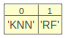

In [148]:
lolviz.listviz(tmp1)

In [149]:
import pickle



# Save the dictionary as a pickle file
pickle_path = "/Users/pmaire/Downloads/TAM_optuna.pkl"
with open(pickle_path, "wb") as file:
    pickle.dump(TAM.optuna, file)




In [77]:
# Example usage
X, y = df_for_training[selected_features_keys], df_for_training[target_key].iloc[:, 0]

metric_fn = 'roc_auc'  # Scoring metric
direction='maximize'

knn_study = DefaultOptunaStudies.default_knn_study(X, y, metric_fn=metric_fn, direction=direction, n_trials=100, cv_folds=3)
rf_study = DefaultOptunaStudies.default_rf_study(X, y, metric_fn=metric_fn, direction=direction, n_trials=100, cv_folds=3)


[I 2024-04-04 16:03:11,770] A new study created in memory with name: no-name-588c25c9-f168-4718-8ab8-d7f7b48bca53
[I 2024-04-04 16:03:12,452] Trial 0 finished with value: 0.9777777777777779 and parameters: {'n_neighbors': 4, 'weights': 'uniform', 'p': 2}. Best is trial 0 with value: 0.9777777777777779.
[I 2024-04-04 16:03:12,942] Trial 1 finished with value: 0.861111111111111 and parameters: {'n_neighbors': 3, 'weights': 'uniform', 'p': 2}. Best is trial 0 with value: 0.9777777777777779.
[I 2024-04-04 16:03:13,364] Trial 2 finished with value: 0.9666666666666667 and parameters: {'n_neighbors': 6, 'weights': 'uniform', 'p': 2}. Best is trial 0 with value: 0.9777777777777779.
[I 2024-04-04 16:03:13,379] Trial 3 finished with value: 0.9722222222222222 and parameters: {'n_neighbors': 8, 'weights': 'uniform', 'p': 1}. Best is trial 0 with value: 0.9777777777777779.
[I 2024-04-04 16:03:13,783] Trial 4 finished with value: 0.9666666666666667 and parameters: {'n_neighbors': 4, 'weights': 'unif

In [94]:
InvalidParameterError: The 'scoring' parameter of cross_val_score must be a str among {'f1', 'recall_micro', 'f1_micro', 'precision_macro', 'neg_log_loss', 'homogeneity_score', 'neg_brier_score', 'neg_mean_absolute_error', 'neg_mean_gamma_deviance', 'accuracy', 'precision_samples', 'neg_mean_squared_log_error', 'completeness_score', 'fowlkes_mallows_score', 'roc_auc', 'jaccard_micro', 'matthews_corrcoef', 'neg_mean_absolute_percentage_error', 'roc_auc_ovr', 'max_error', 'neg_negative_likelihood_ratio', 'recall', 'roc_auc_ovo', 'neg_mean_squared_error', 'recall_samples', 'v_measure_score', 'precision', 'adjusted_rand_score', 'precision_micro', 'recall_weighted', 'adjusted_mutual_info_score', 'neg_root_mean_squared_log_error', 'average_precision', 'r2', 'positive_likelihood_ratio', 'jaccard_samples', 'jaccard_macro', 'explained_variance', 'f1_weighted', 'neg_median_absolute_error', 'roc_auc_ovo_weighted', 'recall_macro', 'jaccard', 'f1_samples', 'jaccard_weighted', 'f1_macro', 'precision_weighted', 'mutual_info_score', 'normalized_mutual_info_score', 'balanced_accuracy', 'rand_score', 'neg_mean_poisson_deviance', 'top_k_accuracy', 'roc_auc_ovr_weighted', 'neg_root_mean_squared_error'}, a callable or None. Got 'auc' instead.



rf_study.

In [95]:
!pip install nillip 

  Using cached nillip-1.37-py3-none-any.whl.metadata (752 bytes)
INFO: pip is looking at multiple versions of nillip to determine which version is compatible with other requirements. This could take a while.
  Using cached nillip-1.36-py3-none-any.whl.metadata (749 bytes)
  Using cached numpy-1.24.3.tar.gz (10.9 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [33 lines of output]
      Traceback (most recent call last):
        File "/Users/pmaire/Documents/GitHub/methyl_chla/.venv/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 353, in <module>
          main()
        File "/Users/pmaire/Documents/GitHub/methyl_chla/.venv/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook

In [78]:
# Best models and params
rf_best_params = rf_study.best_params
rf_best_score = rf_study.best_value

knn_best_params = knn_study.best_params
knn_best_score = knn_study.best_value

In [79]:
rf_best_score, knn_best_score

(0.9888888888888889, 0.9888888888888889)

In [80]:

rf_model = RandomForestClassifier(**rf_best_params, random_state=42)
rf_model.fit(X, y)


knn_model = KNeighborsClassifier(**knn_best_params)
knn_model.fit(X, y)

KNeighborsClassifier(n_neighbors=6, p=1, weights='distance')

/var/folders/91/zl23y5hx0lx_bk1pmks_bqjw0000gs/T/ipykernel_38674/1197069277.py:4: ExperimentalWarning:

plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.

/var/folders/91/zl23y5hx0lx_bk1pmks_bqjw0000gs/T/ipykernel_38674/1197069277.py:6: ExperimentalWarning:

plot_edf is experimental (supported from v2.2.0). The interface can change in the future.

/var/folders/91/zl23y5hx0lx_bk1pmks_bqjw0000gs/T/ipykernel_38674/1197069277.py:8: ExperimentalWarning:

plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.

/var/folders/91/zl23y5hx0lx_bk1pmks_bqjw0000gs/T/ipykernel_38674/1197069277.py:10: ExperimentalWarning:

plot_slice is experimental (supported from v2.2.0). The interface can change in the future.

/var/folders/91/zl23y5hx0lx_bk1pmks_bqjw0000gs/T/ipykernel_38674/1197069277.py:12: ExperimentalWarning:

plot_contour is experimental (supported from v2.2.0). The interface can change in

array([[<Axes: ylabel='n_neighbors'>, <Axes: >, <Axes: >],
       [<Axes: ylabel='p'>, <Axes: >, <Axes: >],
       [<Axes: xlabel='n_neighbors', ylabel='weights'>,
        <Axes: xlabel='p'>, <Axes: xlabel='weights'>]], dtype=object)

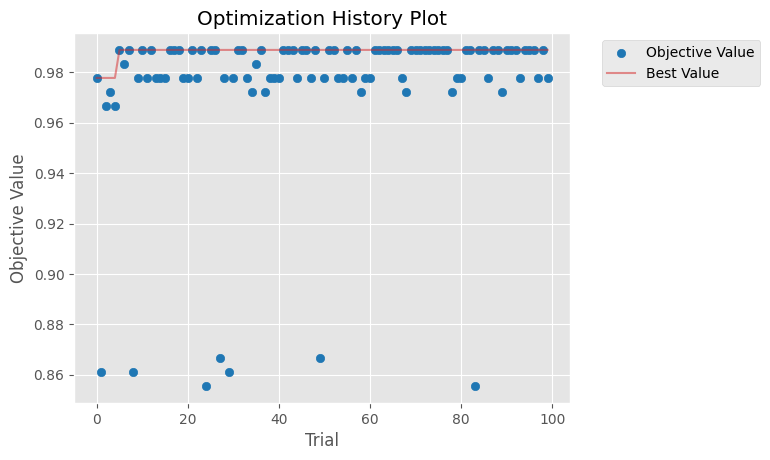

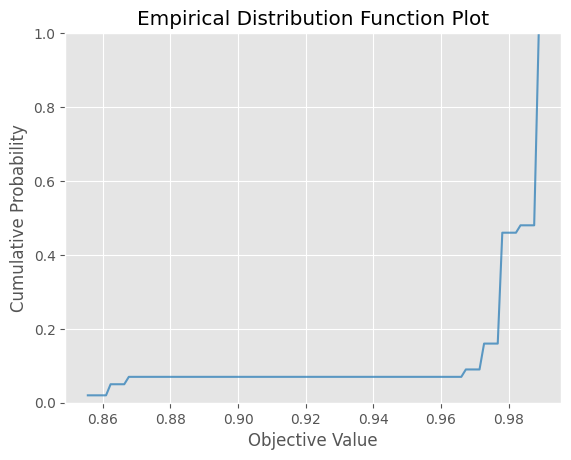

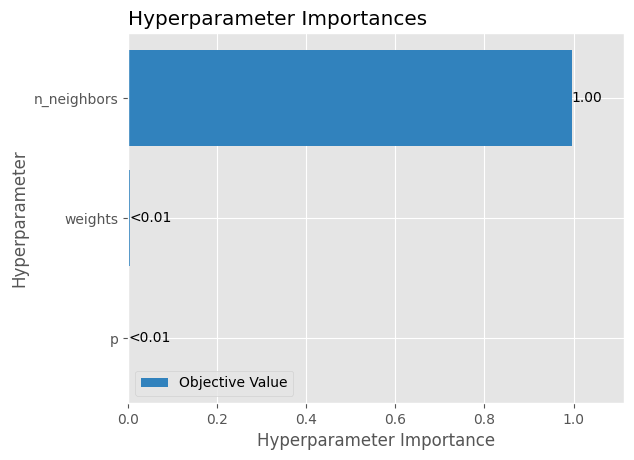

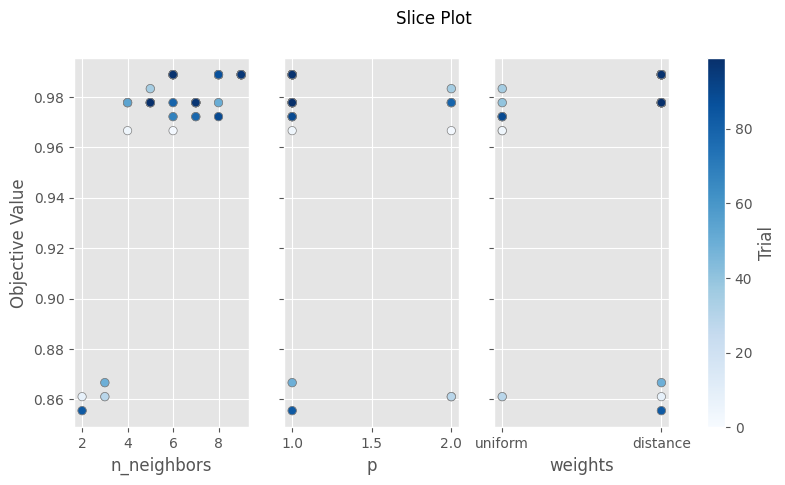

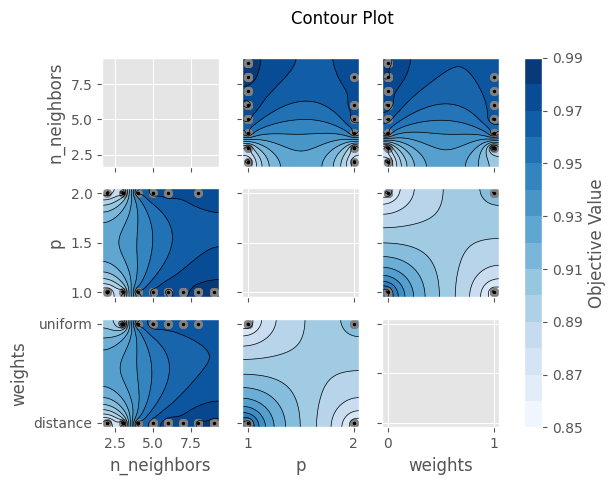

In [83]:
from optuna.visualization.matplotlib import plot_optimization_history, plot_edf, plot_param_importances, plot_slice, plot_contour

# Optimization History
plot_optimization_history(knn_study)
# Empirical Distribution Function (EDF)
plot_edf(knn_study)
# Parameter Importance
plot_param_importances(knn_study)
# Slice Plot
plot_slice(knn_study)
# Contour Plot
plot_contour(knn_study)


/var/folders/91/zl23y5hx0lx_bk1pmks_bqjw0000gs/T/ipykernel_38674/753242532.py:4: ExperimentalWarning:

plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.

/var/folders/91/zl23y5hx0lx_bk1pmks_bqjw0000gs/T/ipykernel_38674/753242532.py:6: ExperimentalWarning:

plot_edf is experimental (supported from v2.2.0). The interface can change in the future.

/var/folders/91/zl23y5hx0lx_bk1pmks_bqjw0000gs/T/ipykernel_38674/753242532.py:8: ExperimentalWarning:

plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.

/var/folders/91/zl23y5hx0lx_bk1pmks_bqjw0000gs/T/ipykernel_38674/753242532.py:10: ExperimentalWarning:

plot_slice is experimental (supported from v2.2.0). The interface can change in the future.

/var/folders/91/zl23y5hx0lx_bk1pmks_bqjw0000gs/T/ipykernel_38674/753242532.py:12: ExperimentalWarning:

plot_contour is experimental (supported from v2.2.0). The interface can change in the 

array([[<Axes: ylabel='max_depth'>, <Axes: >, <Axes: >],
       [<Axes: ylabel='min_samples_split'>, <Axes: >, <Axes: >],
       [<Axes: xlabel='max_depth', ylabel='n_estimators'>,
        <Axes: xlabel='min_samples_split'>,
        <Axes: xlabel='n_estimators'>]], dtype=object)

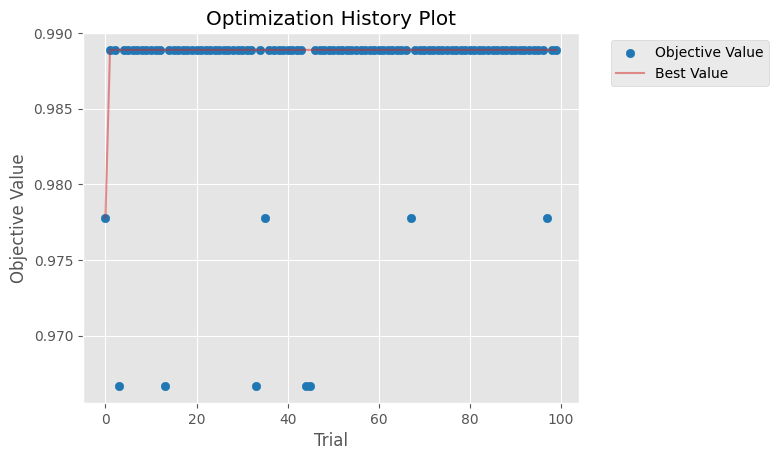

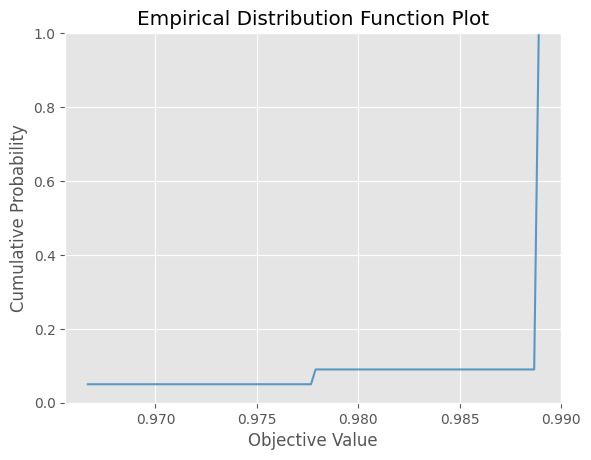

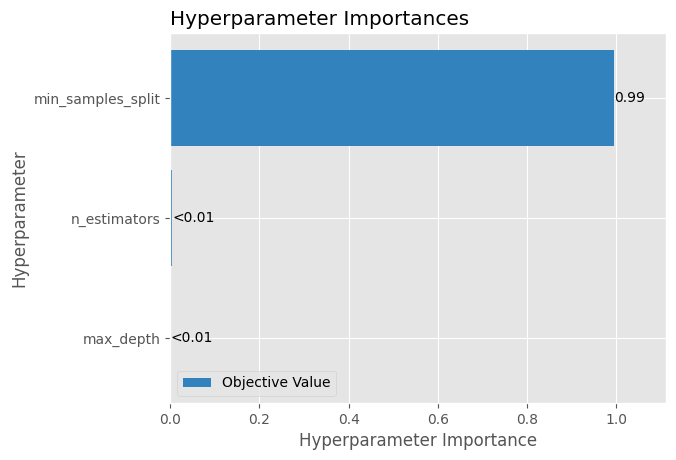

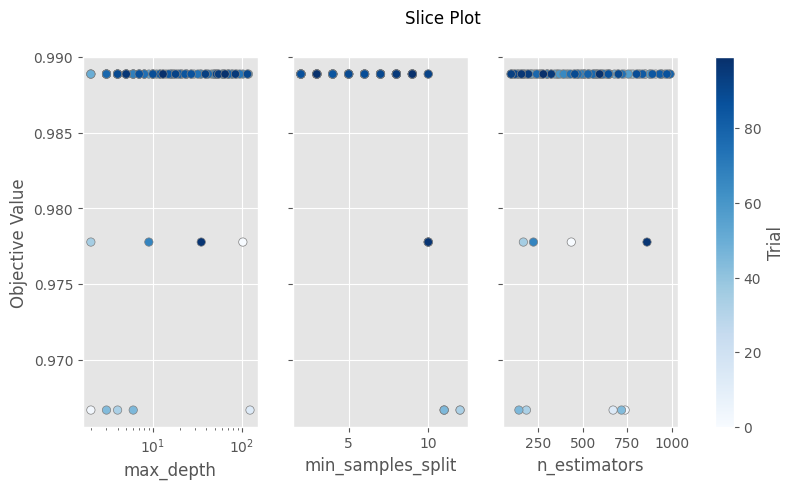

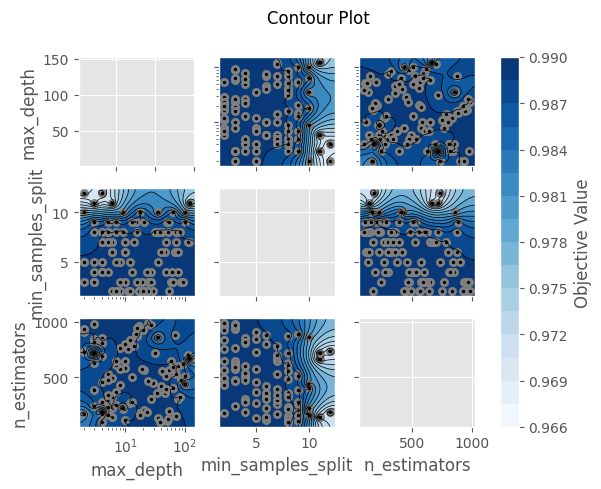

In [81]:
from optuna.visualization.matplotlib import plot_optimization_history, plot_edf, plot_param_importances, plot_slice, plot_contour

# Optimization History
plot_optimization_history(rf_study)
# Empirical Distribution Function (EDF)
plot_edf(rf_study)
# Parameter Importance
plot_param_importances(rf_study)
# Slice Plot
plot_slice(rf_study)
# Contour Plot
plot_contour(rf_study)


In [74]:
# Define a list of metrics and their corresponding directions
metrics = [
    ('accuracy', 'maximize'),
    ('precision_weighted', 'maximize'),  # Use weighted for imbalanced classes
    ('recall_weighted', 'maximize'),
    ('f1_weighted', 'maximize'),
    ('roc_auc_ovr', 'maximize'),  # For multi-class ROC AUC
    # Add more metrics as needed, ensure they are valid for your problem
]

X, y = df_for_training[selected_features_keys], df_for_training[target_key].iloc[:, 0]


# Iterate over the metrics, running a study for each one
for metric_fn, direction in metrics:
    print(f"Testing metric: {metric_fn} with direction {direction}")
    study = DefaultOptunaStudies.default_knn_study(X, y, metric_fn=metric_fn, direction=direction, n_trials=4, cv_folds=3)
    print(f"Best Params for {metric_fn}: {study.best_params}")
    print(f"Best Score for {metric_fn}: {study.best_value}\n")

[I 2024-04-04 12:57:38,569] A new study created in memory with name: no-name-510dbcb1-3370-47ca-b3b4-b56e6bf125d8
[I 2024-04-04 12:57:38,720] Trial 0 finished with value: 0.8181818181818182 and parameters: {'n_neighbors': 5, 'weights': 'uniform', 'algorithm': 'ball_tree', 'p': 1}. Best is trial 0 with value: 0.8181818181818182.


9.0
0.8181818181818182
9.0


[I 2024-04-04 12:57:38,825] Trial 1 finished with value: 0.8787878787878789 and parameters: {'n_neighbors': 7, 'weights': 'uniform', 'algorithm': 'brute', 'p': 2}. Best is trial 1 with value: 0.8787878787878789.
[I 2024-04-04 12:57:38,850] Trial 2 finished with value: 0.8484848484848485 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'algorithm': 'auto', 'p': 2}. Best is trial 1 with value: 0.8787878787878789.
[I 2024-04-04 12:57:38,880] Trial 3 finished with value: 0.8181818181818182 and parameters: {'n_neighbors': 5, 'weights': 'uniform', 'algorithm': 'kd_tree', 'p': 1}. Best is trial 1 with value: 0.8787878787878789.
[I 2024-04-04 12:57:38,895] Trial 4 finished with value: 0.8484848484848485 and parameters: {'n_neighbors': 7, 'weights': 'uniform', 'algorithm': 'auto', 'p': 1}. Best is trial 1 with value: 0.8787878787878789.
[I 2024-04-04 12:57:38,917] Trial 5 finished with value: 0.8787878787878788 and parameters: {'n_neighbors': 2, 'weights': 'distance', 'algorithm': 'kd_

0.8787878787878789
9.0
0.8484848484848485
9.0
0.8181818181818182
9.0
0.8484848484848485
9.0
0.8787878787878788
9.0
0.8787878787878788
9.0
0.8181818181818182
9.0
0.8484848484848485
9.0
0.8484848484848485
KNN Best Params: {'n_neighbors': 7, 'weights': 'uniform', 'algorithm': 'brute', 'p': 2}


0               MB
1               MB
2               MB
3               MB
4               MB
5               MB
6               MB
7               MB
8               MB
9               MB
10              MB
11              MB
12              MB
13              MB
14              MB
18     OTHER_EMBRY
20     OTHER_EMBRY
29     OTHER_EMBRY
30     OTHER_EMBRY
36     OTHER_EMBRY
40     OTHER_EMBRY
41     OTHER_EMBRY
44     OTHER_EMBRY
70     OTHER_EMBRY
81     OTHER_EMBRY
82     OTHER_EMBRY
83     OTHER_EMBRY
87     OTHER_EMBRY
94     OTHER_EMBRY
95     OTHER_EMBRY
97     OTHER_EMBRY
106    OTHER_EMBRY
118    OTHER_EMBRY
Name: Family_code, dtype: object

In [ ]:
"""
BATCH ADJUSTMENT 

"""

In [84]:
tmp1 = target_dict, selected_feature_dict, sample_dict
len(tmp1)

3

In [ ]:
     
key = ('Superfamily_code', 'EMBRY')

target_key = fclass.target_key_dict[key]
sample_row_idx = fclass.sample_dict[key]
selected_features_idx = RFFS.RF_selected_features[key]
# print(sample_row_idx[:5], selected_features_idx[:5])


combined_columns = target_key + selected_features_idx
tmp1 = df.loc[sample_row_idx, combined_columns]

"""
enforce schema for the input data type

standarize the categories encoding many way to do this. 


"""

tmp1

In [178]:
# Sample Index
index_obj = pd.Index(['cg17090968', 'cg04209913', 'cg09799983', 'cg03350900', 'cg11740348',
                      'cg07060794', 'cg08810842', 'cg22336806', 'cg09884146', 'cg03625415'],
                     dtype='object')

# Accessing multiple specific positions
selected_elements = [index_obj[i] for i in [0, 5, 8]]
selected_elements

['cg17090968', 'cg07060794', 'cg09884146']

In [179]:
# Convert Index to Series
index_series = pd.Series(index_obj)

# Using .iloc to access multiple specific positions
selected_series = index_series.iloc[[0, 5, 8]]
print(selected_series)


0    cg17090968
5    cg07060794
8    cg09884146
dtype: object


In [164]:
x = [0,1,5,3,2,6,5,2,32,83,6,1,-1,-5]
[x[k] for k in np.argsort(x)[-4:]]

[6, 6, 32, 83]

In [167]:
[x[k] for k in np.argsort(x)]

[-5, -1, 0, 1, 1, 2, 2, 3, 5, 5, 6, 6, 32, 83]

In [161]:
# nil.info(RFFS)

RFFS.RF_feature_importance_dict['Full_model']

array([0.06282596, 0.09287444, 0.15709464, 0.11467024, 0.09381881,
       0.08881982, 0.09645339, 0.08934002, 0.11805322, 0.08604947])

In [153]:
# # class filter_feature_selection_dictionary():
# #     def __init__(self, feature_dict):
# #         self.feature_dict = copy.deepcopy(feature_dict)
# class Random_forrest_feature_selection():

#     def __init__():
#         asdf
        
#     def get_preset_RF():
#         """
#         Init random forrest classifier using default parameters 
#         """
#         rf = RandomForestClassifier(
#         n_estimators=500,                                 # matches the R code provided
#         criterion='gini',                                 # matches the R code provided, default for classification 
#         max_depth=None,                 # no equivalent in the R code provided
#         min_samples_split=2,            # no equivalent in the R code provided
#         min_samples_leaf=1,                               # no equivalent in the R code provided -- set to 1 so it is irrelivent 
#         min_weight_fraction_leaf=0.0,   # no equivalent in the R code provided
#         max_features='sqrt',                              # same as "mtry" in R, "sqrt(p)" is default in R 
#             max_leaf_nodes=None,                          # same as "maxnode" default in R is NULL eq to None in python
#         min_impurity_decrease=0.0,                        # no equivalent in the R, set to 0 to match R (I assume since there is no param for this)
#         bootstrap=True,                                   # consistant with R when set to True: when R code "replace" is set to True
#         oob_score=False,                                  # for Python it is default accuracy (but can be customized, for R param "err.rate" is kinda the same but not sure which metric
#         n_jobs=None,                     # num jobs run in parallel
#         random_state=42,                 # equivalent is set.seed -- not set in R code provided 
#         verbose=0,                       # 
#         warm_start=False,                # no equivalent in the R, default in python is False
#         class_weight=None,               # no equivalent in the R, it would be wise to use this for our data
#         ccp_alpha=0.0,                   # no equivalent in the R, default in python is 0 
#         max_samples=None                 # no equivalent in the R, realted to "sampsize", instead of fraction it is a count and can be stratified per class
#         )
#         return rf
    
    
    
#     def run_RF_feature_selection(df, fclass, rf=None):
#         """
#         Runs feature selection using a RandomForestClassifier.
    
#         This function iterates over features and samples defined in `fclass`, subsets the DataFrame `df` based on these features and samples, and optionally uses a provided RandomForestClassifier `rf` or creates a default one to fit the data. It outputs the final 
    
#         Parameters:
#         - df (pd.DataFrame): The DataFrame containing the features and target variables.
#         - fclass: An object that must have `feature_dict` and `sample_dict` attributes, and methods `ordered_hierarchy_keys` and `_next_level`. These are used to define the features and samples for subsets and the target variable for the RandomForestClassifier.
#         - rf (RandomForestClassifier, optional): A pre-initialized RandomForestClassifier instance. If None, a new classifier is created with predefined settings.
    
#         Returns:
#         - RandomForestClassifier: The RandomForestClassifier used in the last iteration of feature selection. If `rf` was provided, this will be the same instance, fitted to the last subset of data.
#         """
#         feature_dict = copy.deepcopy(fclass.feature_dict)
#         sample_dict = copy.deepcopy(fclass.sample_dict)
    
#         RF_models_feature_selection_dict = {}
#         RF_feature_importance_dict = {}
        
#         for key, col_idx in feature_dict.items():
#             row_idx = sample_dict[key]
        
#             # get prediction target for RF for each model and sub model 
#             target_key = [fclass.ordered_hierarchy_keys[0] if key == 'Full_model' else fclass._next_level(key[0])]
            
#             combined_columns = target_key + col_idx.tolist()
#             selected_df = df.loc[row_idx, combined_columns]
    
#             if rf is None:
#                 rf = get_preset_RF()
    
#             X = selected_df[col_idx]  # Feature matrix
#             y = selected_df[target_key].iloc[:, 0]  # Target variable (.iloc[:, 0] to unravel to 1D)
#             rf.fit(X, y)
            
#             RF_models_feature_selection_dict[key] = rf
#             RF_feature_importance_dict[key] = rf.feature_importances_
            
#         return RF_feature_selection_dict, RF_feature_importance_dict
    
#     def select_top_n_features():

# RF_feature_selection_dict, RF_feature_importance_dict = run_RF_feature_selection(df, fclass, rf=None)
# # Feature importances from the model
# # feature_importances = rf.feature_importances_






        

In [154]:
_ = [print(k) for k in RF_feature_selection_dict.keys()]

Full_model
('Superfamily_code', 'CNTRL')
('Superfamily_code', 'CRAN_PARASPIN')
('Superfamily_code', 'EMBRY')
('Superfamily_code', 'GLIOMA_GLIONEUR_NEUR')
('Superfamily_code', 'HEMA')
('Superfamily_code', 'MELANO')
('Superfamily_code', 'MESEN_NONMENING')
('Superfamily_code', 'PIN_RET')
('Superfamily_code', 'SELLAR')
('Family_code', 'CIRC_ASTR_GLIO')
('Family_code', 'CNTL_BRAIN')
('Family_code', 'CRANIO')
('Family_code', 'CTRL_TME')
('Family_code', 'EPENDYM')
('Family_code', 'ESTHESIO')
('Family_code', 'GLIONEUR_NEUR')
('Family_code', 'HGG')
('Family_code', 'MB')
('Family_code', 'OTHER_EMBRY')
('Family_code', 'PAP_PINEAL')
('Family_code', 'PINEOBLAST')
('Family_code', 'PIT_AD')
('Family_code', 'PLEXUS')
('Family_code', 'SFT')
('Family_code', 'UNCERT_DIFF')


In [168]:
# RF_feature_importance_dict

In [134]:

# Assuming `selected_df` is your DataFrame, `target_key` is the name of the target variable,
# and `col_idx` is the list or Index object of feature names

X = selected_df[col_idx]  # Feature matrix
y = selected_df[target_key].iloc[:, 0]  # Target variable (.iloc[:, 0] to unravel to 1D)

# Initialize RandomForestClassifier with all the default settings explicitly defined (as of version 0.24.1)
rf = RandomForestClassifier(
    n_estimators=500,                                 # matches the R code provided
    criterion='gini',                                 # matches the R code provided, default for classification 
    max_depth=None,                 # no equivalent in the R code provided
    min_samples_split=2,            # no equivalent in the R code provided
    min_samples_leaf=1,                               # no equivalent in the R code provided -- set to 1 so it is irrelivent 
    min_weight_fraction_leaf=0.0,   # no equivalent in the R code provided
    max_features='sqrt',                              # same as "mtry" in R, "sqrt(p)" is default in R 
    max_leaf_nodes=None,                              # same as "maxnode" default in R is NULL eq to None in python
    min_impurity_decrease=0.0,                        # no equivalent in the R, set to 0 to match R (I assume since there is no param for this)
    bootstrap=True,                                   # consistant with R when set to True: when R code "replace" is set to True
    oob_score=False,                                  # for Python it is default accuracy (but can be customized, for R param "err.rate" is kinda the same but not sure which metric
    n_jobs=None,                     # num jobs run in parallel
    random_state=42,                 # equivalent is set.seed -- not set in R code provided 
    verbose=0,                       # 
    warm_start=False,                # no equivalent in the R, default in python is False
    class_weight=None,               # no equivalent in the R, it would be wise to use this for our data
    ccp_alpha=0.0,                   # no equivalent in the R, default in python is 0 
    max_samples=None                 # no equivalent in the R, realted to "sampsize", instead of fraction it is a count and can be stratified per class
)

"""
Alex RF code notes 
sampsize is not set the default is used

"""

# Fit the model
rf.fit(X, y)

# Feature importances from the model
feature_importances = rf.feature_importances_

# Since Scikit-learn's RandomForestClassifier does not directly provide gain and times used importances,
# `feature_importances_` gives the mean decrease in impurity (Gini importance) by default.
# For more detailed feature importances like gain or times used, consider using a tree interpretation library
# or examining additional output from ensemble methods.


In [137]:
feature_importances

array([0.04435318, 0.19276181, 0.09055441, 0.0523614 , 0.20708419,
       0.07756674, 0.03963039, 0.15400411, 0.07145791, 0.07022587])

In [135]:
# nil.info(rf)

type is <class 'sklearn.ensemble._forest.RandomForestClassifier'> will try printing using "get_class_info2" 
apply                    type->   method                                        None  ->   None   ...fier(n_estimators=500, random_state=42)>
bootstrap                type->   bool                                          None  ->   None   > True
ccp_alpha                type->   float                                         None  ->   None   > 0.0
class_weight             type->   NoneType                                      None  ->   None   > None
classes_                 type->   numpy.ndarray                                 shape ->   (2,)   > ['CNS_SARC_CIC' 'EWS']
criterion                type->   str                                           length->   4      > gini
decision_path            type->   method                                        None  ->   None   ...fier(n_estimators=500, random_state=42)>
estimator                type->   sklearn.tree._classes.DecisionT

In [136]:
score.score

NameError: name 'score' is not defined

In [80]:
col_idx, Keys.targets

(Index(['cg00698771', 'cg09814029', 'cg00590173', 'cg03078363', 'cg11165254',
        'cg17090968', 'cg10623600', 'cg03094555', 'cg02928365', 'cg01273336'],
       dtype='object'),
 ['Superfamily_code', 'Family_code', 'Class_v12_code'])

In [109]:
fclass.ordered_hierarchy_keys

(('Family_code', 'UNCERT_DIFF'),
 Index(['cg00698771', 'cg09814029', 'cg00590173', 'cg03078363', 'cg11165254',
        'cg17090968', 'cg10623600', 'cg03094555', 'cg02928365', 'cg01273336'],
       dtype='object'))

In [83]:
print(key)
combined_columns = Keys.targets + col_idx.tolist()
selected_df = df.loc[row_idx, combined_columns]
selected_df
"""
TOMORROW 
add a one to the right as a function. use it to input family code and then output the one to the right. if none use superfamily etc 

"""

('Family_code', 'UNCERT_DIFF')


,Superfamily_code,Family_code,Class_v12_code,cg00698771,cg09814029,cg00590173,cg03078363,cg11165254,cg17090968,cg10623600,cg03094555,cg02928365,cg01273336
93,MESEN_NONMENING,UNCERT_DIFF,CNS_SARC_CIC,0.051607,0.114027,0.135960,0.917757,0.205136,0.974512,0.961461,0.077338,0.053894,0.763298
116,MESEN_NONMENING,UNCERT_DIFF,CNS_SARC_CIC,0.977938,0.153343,0.340490,0.030035,0.126417,0.062431,0.809229,0.138272,0.056809,0.152960
138,MESEN_NONMENING,UNCERT_DIFF,CNS_SARC_CIC,0.000376,0.194952,0.810271,0.060946,0.132074,0.116152,0.099051,0.224423,0.707510,0.340458
210,MESEN_NONMENING,UNCERT_DIFF,EWS,0.953946,0.926938,0.860391,0.021264,0.914232,0.835410,0.893438,0.761164,0.735702,0.889978
211,MESEN_NONMENING,UNCERT_DIFF,EWS,0.884258,0.879832,0.090083,0.583317,0.706367,0.920827,0.849094,0.925970,0.135753,0.228689
238,MESEN_NONMENING,UNCERT_DIFF,EWS,0.975603,0.848003,0.872072,0.730059,0.811057,0.850679,0.062948,0.652688,0.479099,0.848466


0      False
1      False
2      False
3      False
4      False
       ...  
268    False
269    False
270    False
271    False
272    False
Name: Family_code, Length: 273, dtype: bool

In [51]:
df[sample_dict]

,cg04209913,cg24981593,cg10623600,cg01207684,cg25286482,cg06132069,cg19685398,cg17090968,cg08684879,cg10193711
0,0.957660,0.880206,0.892596,0.689138,0.437610,0.881157,0.871105,0.903203,0.877601,0.064660
1,0.479484,0.549356,0.924873,0.901707,0.787077,0.849258,0.876959,0.907800,0.872781,0.136347
2,0.170831,0.780415,0.960258,0.964254,0.747812,0.834966,0.933284,0.821747,0.916791,0.347642
3,0.032742,0.878653,0.248598,0.649712,0.954239,0.882828,0.882949,0.151583,0.911286,0.065328
4,0.051339,0.882442,0.000000,0.971505,0.273014,0.887106,0.840386,0.936575,0.855146,0.556122
...,...,...,...,...,...,...,...,...,...,...
268,0.525080,0.110503,0.184995,0.554307,0.368329,0.353614,0.421679,0.389242,0.707935,0.846112
269,0.569836,0.156192,0.223783,0.527383,0.341912,0.267253,0.413058,0.364666,0.703106,0.816916
270,0.058847,0.554293,0.612695,0.908910,0.257773,0.822999,0.332798,0.158572,0.105684,0.230585
271,0.097293,0.908827,0.092501,0.929232,0.400905,0.821034,0.090114,0.129474,0.207463,0.563816


In [25]:
hierarchy_key = 'Superfamily_code'
hierarchy_name = 'EMBRY'
selected_rows_index = df[hierarchy_key] ==hierarchy_name

selected_rows_index = slice(None)
df.loc[selected_rows_index]

,Superfamily_code,Family_code,Class_v12_code,cg00212031,cg00650640,cg02010442,cg03272642,cg04413754,cg05467600,cg06443675,...,cg20787201,cg21432763,cg22117819,cg22764925,cg23568913,cg24300216,cg25246692,cg25947555,cg26730347,cg27454842
0,EMBRY,MB,MB_SHH_CHL_AD,0.060056,0.174830,0.069681,0.014120,0.323789,0.001262,0.051747,...,0.441887,0.777161,0.615736,0.107996,0.051777,0.867771,0.144181,0.083772,0.346352,0.639290
1,EMBRY,MB,MB_SHH_INF,0.105263,0.000000,0.022624,0.038429,0.364521,0.014286,0.103865,...,0.542503,0.805603,0.405675,0.140824,0.031228,0.905519,0.107303,0.054950,0.229818,0.557485
2,EMBRY,MB,MB_G3,0.066739,0.000000,0.084729,0.017830,0.314324,0.011889,0.036709,...,0.834260,0.770924,0.325451,0.114108,0.035967,0.909144,0.128023,0.053382,0.626938,0.427096
3,EMBRY,MB,MB_G4,0.531080,0.063247,0.005567,0.563444,0.217828,0.049134,0.430767,...,0.754954,0.770129,0.084212,0.079013,0.000000,0.840391,0.070619,0.026671,0.222368,0.451694
4,EMBRY,MB,MB_G3,0.043150,0.024174,0.016813,0.047187,0.339644,0.010687,0.100941,...,0.841666,0.298231,0.355325,0.179955,0.034624,0.887187,0.087058,0.050882,0.075250,0.266236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,CNTRL,CNTL_BRAIN,CTRL_HYPOTHAL,0.058519,0.179859,0.036976,0.031447,0.213456,0.000087,0.029990,...,0.858359,0.717412,0.655881,0.401737,0.053558,0.922711,0.324555,0.093040,0.590416,0.531673
269,CNTRL,CNTL_BRAIN,CTRL_HYPOTHAL,0.033036,0.070123,0.038106,0.024388,0.284708,0.000090,0.085306,...,0.851719,0.751161,0.631748,0.426520,0.057775,0.916897,0.308583,0.090510,0.495698,0.492520
270,SELLAR,PIT_AD,PITAD_TSH,0.066259,0.181447,0.052543,0.034760,0.302180,0.000118,0.080423,...,0.753122,0.438892,0.472267,0.185292,0.049762,0.529293,0.456113,0.059071,0.839434,0.860006
271,SELLAR,PIT_AD,PITAD_TSH,0.310545,0.025473,0.064488,0.079658,0.226034,0.093056,0.068528,...,0.824229,0.389241,0.655720,0.191878,0.038382,0.800685,0.353596,0.092287,0.534643,0.655044


In [16]:
# Assuming self.hierarchy_keys are the keys to sort and
# self.hierarchy_levels contain the corresponding levels (lower numbers first),
# this code sorts hierarchy_keys based on hierarchy_levels.

hierarchy_keys = ['b', 'c', 'a']
hierarchy_levels = [2, 1, 3]

sorted_keys = [key for _, key in sorted(zip(hierarchy_levels, hierarchy_keys))]
sorted_keys


['c', 'b', 'a']

In [19]:
for lev, key in sorted(zip(hierarchy_levels, hierarchy_keys)):
    print(lev, key)

1 c
2 b
3 a


In [ ]:
import pandas as pd
import numpy as np
from datetime import date

# Assume 'df' is already loaded and available
# Define the utility directory for saving the output files
util_dir = "path_to_util_directory"

def calculate_IQR(betas):
    return betas.apply(np.quantile, q=[0.25, 0.75]).diff().iloc[1]

def write_top_probes(df, identifier, top_n=10000):
    IQR = calculate_IQR(df.drop(columns=identifier))
    top_probes = IQR.sort_values(ascending=False).head(top_n).index
    filename = f"{util_dir}/{date.today()}_{df[identifier].iloc[0]}_cpg_probes.csv"
    pd.DataFrame(top_probes).to_csv(filename, index=False)

# Main function to process the DataFrame
def process_dataframe(df):
    # Calculating IQR for the entire dataset excluding identifier columns
    ref_IQR = calculate_IQR(df.iloc[:, 3:])
    superfamily_probes = ref_IQR.sort_values(ascending=False).head(10000).index
    pd.DataFrame(superfamily_probes).to_csv(f"{util_dir}/{date.today()}_superfamily_probes.csv", index=False)
    
    # Processing for each superfamily code
    for code in df['Superfamily_code'].unique():
        superfamily_df = df[df['Superfamily_code'] == code].drop(columns=['Superfamily_code', 'Family_code', 'Class_v12_code'])
        write_top_probes(superfamily_df, 'Family_code')
    
    # Processing for each family code
    for code in df['Family_code'].unique():
        family_df = df[df['Family_code'] == code].drop(columns=['Superfamily_code', 'Family_code', 'Class_v12_code'])
        write_top_probes(family_df, 'Class_v12_code')

# Call the function
process_dataframe(df)


In [4]:
import pandas as pd
import numpy as np
from datetime import date

def calculate_IQR(betas):
    """Calculate the IQR for each column."""
    return betas.apply(np.quantile, q=[0.25, 0.75]).diff().iloc[1]

def write_top_probes(df, identifier, top_n=10000):
    """Write top probes based on IQR to a CSV file."""
    IQR = calculate_IQR(df.drop(columns=identifier))
    top_probes = IQR.sort_values(ascending=False).head(top_n).index
    filename = f"{date.today()}_{df[identifier].iloc[0]}_cpg_probes.csv"
    pd.DataFrame(top_probes).to_csv(filename, index=False)

def process_dataframe(df):
    """Process the dataframe to find and write top probes based on IQR."""
    # Exclude the first three columns for the initial IQR calculation
    ref_IQR = calculate_IQR(df.iloc[:, 3:])
    superfamily_probes = ref_IQR.sort_values(ascending=False).head(10000).index
    pd.DataFrame(superfamily_probes).to_csv(f"{date.today()}_superfamily_probes.csv", index=False)
    
    # For each superfamily code
    for code in df['Superfamily_code'].unique():
        superfamily_df = df[df['Superfamily_code'] == code].drop(columns=['Superfamily_code', 'Family_code', 'Class_v12_code'])
        write_top_probes(superfamily_df, 'Family_code')
    
    # For each family code
    for code in df['Family_code'].unique():
        family_df = df[df['Family_code'] == code].drop(columns=['Superfamily_code', 'Family_code', 'Class_v12_code'])
        write_top_probes(family_df, 'Class_v12_code')

# Assuming df is your DataFrame
# process_dataframe(df)


In [5]:
# Call the function
process_dataframe(df)

KeyError: "['Family_code'] not found in axis"